In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e7/sample_submission.csv
/kaggle/input/playground-series-s5e7/train.csv
/kaggle/input/playground-series-s5e7/test.csv


Train shape: (18524, 9)
Test shape: (6175, 8)
Train head:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


Train info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB
None
Missing values (train):
id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
D

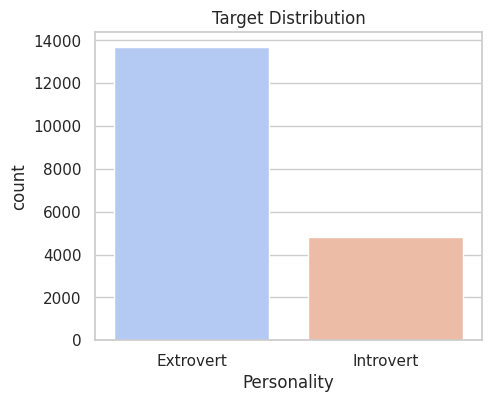

Numerical features: ['id', 'Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
Categorical features: ['Stage_fear', 'Drained_after_socializing']
Numerical feature summary:


,count,mean,std,min,25%,50%,75%,max
id,18524.0,9261.500000,5347.562529,0.0,4630.75,9261.5,13892.25,18523.0
Time_spent_Alone,17334.0,3.137764,3.003786,0.0,1.00,2.0,4.00,11.0
Social_event_attendance,17344.0,5.265106,2.753359,0.0,3.00,5.0,8.00,10.0
Going_outside,17058.0,4.044319,2.062580,0.0,3.00,4.0,6.00,7.0
Friends_circle_size,17470.0,7.996737,4.223484,0.0,5.00,8.0,12.00,15.0
Post_frequency,17260.0,4.982097,2.879139,0.0,3.00,5.0,7.00,10.0


Categorical feature summary:
Stage_fear -> unique: 2, top: No
Drained_after_socializing -> unique: 2, top: No


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


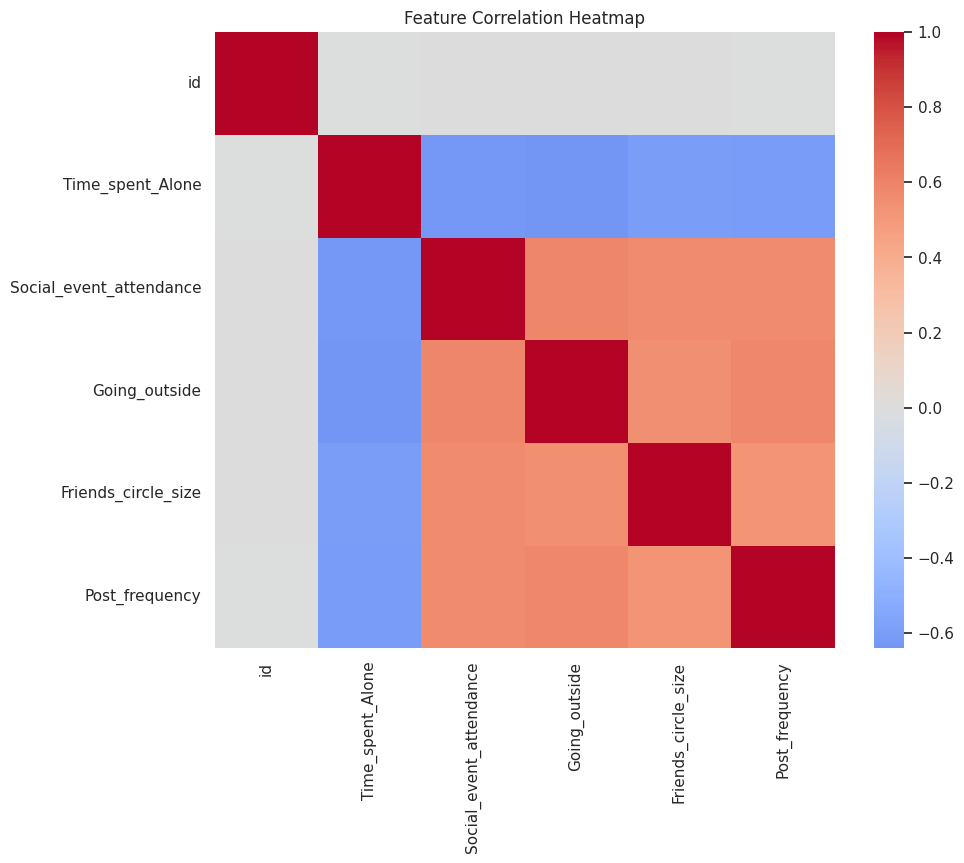

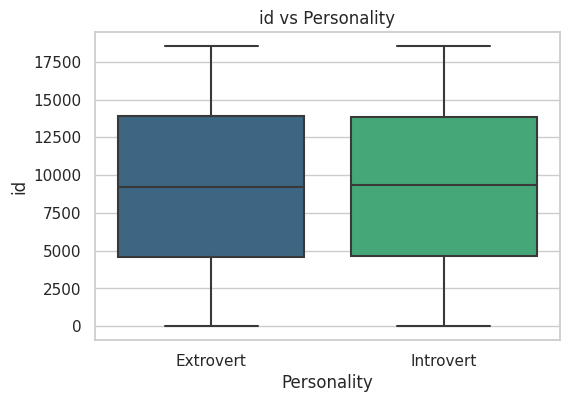

In [3]:
# =============================
# 1. Import libraries
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# =============================
# 2. Load data
# =============================
train = pd.read_csv("/kaggle/input/playground-series-s5e7/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e7/test.csv")

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

# =============================
# 3. Quick preview
# =============================
print("Train head:")
display(train.head())

print("Train info():")
print(train.info())

print("Missing values (train):")
print(train.isnull().sum())

print("Target value counts:")
print(train['Personality'].value_counts(normalize=True))

# =============================
# 4. Visualize target balance
# =============================
plt.figure(figsize=(5,4))
sns.countplot(data=train, x='Personality', palette='coolwarm')
plt.title("Target Distribution")
plt.show()

# =============================
# 5. Identify feature types
# =============================
target = 'Personality'
features = [col for col in train.columns if col != target]

num_features = train[features].select_dtypes(include=['int64', 'float64']).columns
cat_features = train[features].select_dtypes(include=['object']).columns

print("Numerical features:", list(num_features))
print("Categorical features:", list(cat_features))

# =============================
# 6. Summary stats
# =============================
print("Numerical feature summary:")
display(train[num_features].describe().T)

print("Categorical feature summary:")
for col in cat_features:
    print(f"{col} -> unique: {train[col].nunique()}, top: {train[col].value_counts().index[0]}")

# =============================
# 7. Correlation heatmap (numerical only)
# =============================
if len(num_features) > 1:
    plt.figure(figsize=(10,8))
    corr = train[num_features].corr()
    sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
    plt.title("Feature Correlation Heatmap")
    plt.show()

# =============================
# 8. Example feature-target relationship
# =============================
if len(num_features) > 0:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=train, x=target, y=num_features[0], palette='viridis')
    plt.title(f"{num_features[0]} vs {target}")
    plt.show()

# Pairplot for a quick feel (optional, may be slow if many features)
# sns.pairplot(train, hue=target, vars=num_features[:4], diag_kind='kde')
# plt.show()


* The id vs Personality boxplot confirms IDs are evenly spread, so id adds no predictive power and should be dropped before modeling.
* From your target distribution:Extrovert ≈ 13.7k (74%) vs Introvert ≈ 4.8k (26%).→ Metrics like raw accuracy will overrate models that just predict “Extrovert.” Better to track balanced accuracy, macro F1, or use class weights.
* Time_spent_Alone is negatively correlated with most social engagement features.
* Social_event_attendance, Going_outside, Friends_circle_size, Post_frequency are moderately positively correlated — likely all measuring different dimensions of “social activity.”
* This means models can capture relationships, but also beware of multicollinearity if using linear models.